# Histograms of ERA5 CWV and CWVsat

In [2]:
import xarray as xr 
import matplotlib.pyplot as plt

In [3]:
!ls /Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/*2014_01_0**

/Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/era5_cwv_that_2014_01_01.nc
/Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/era5_cwv_that_2014_01_02.nc
/Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/era5_cwv_that_2014_01_03.nc
/Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/era5_cwv_that_2014_01_04.nc
/Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/era5_cwv_that_2014_01_05.nc
/Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/era5_cwv_that_2014_01_06.nc
/Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/era5_cwv_that_2014_01_07.nc
/Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/era5_cwv_that_2014_01_08.nc
/Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/era5_cwv_that_2014_01_09.nc


In [61]:
ds = xr.open_mfdataset('/Users/bmapes/Box/VaporLakes/data/era5_cwv_that_2014/era5_cwv_that_2014_??_01.nc',
                      combine="nested") # pool data, ignore time coordinate not being monotonic
ds

<xarray.Dataset>
Dimensions:  (time: 96, lat: 280, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 ... 2014-12-01T21:00:00
  * lat      (lat) float32 -34.88 -34.62 -34.38 -34.12 ... 34.38 34.62 34.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    T_ft     (time, lat, lon) float32 dask.array<chunksize=(96, 280, 1440), meta=np.ndarray>
    T_bl     (time, lat, lon) float32 dask.array<chunksize=(96, 280, 1440), meta=np.ndarray>
    T_lft    (time, lat, lon) float32 dask.array<chunksize=(96, 280, 1440), meta=np.ndarray>
    cwv      (time, lat, lon) float32 dask.array<chunksize=(96, 280, 1440), meta=np.ndarray>
    cwv_sat  (time, lat, lon) float32 dask.array<chunksize=(96, 280, 1440), meta=np.ndarray>
    wv_lft   (time, lat, lon) float32 dask.array<chunksize=(96, 280, 1440), meta=np.ndarray>
    wv_bl    (time, lat, lon) float32 dask.array<chunksize=(96, 280, 1440), meta=np.ndarray>

# ERA5 histograms 8x/day

/Users/bmapes/miniconda3/envs/VaporLakes/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


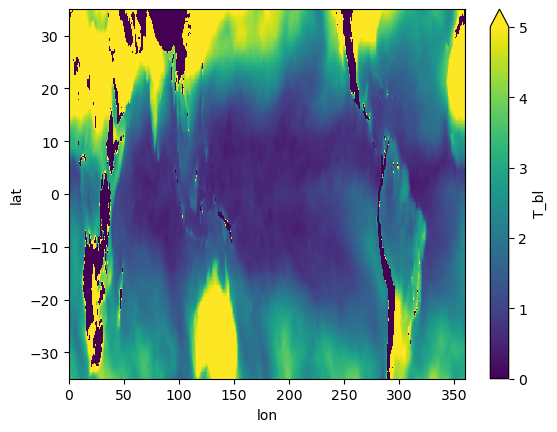

In [63]:
ds.T_bl.std(dim='time').plot(vmin=0,vmax=5)

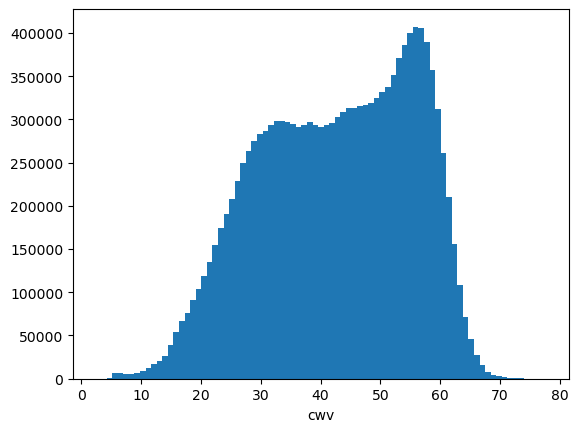

In [70]:
tropics = ds.sel(lat=slice(-20,20), lon=slice(50,280));
tropics.cwv.plot(bins=81);

Text(0.5, 1.0, 'Column RH*70 (blue) and CWV in IndoPac box 20S-20N, 50-280E, era5_2014_??_01.nc')

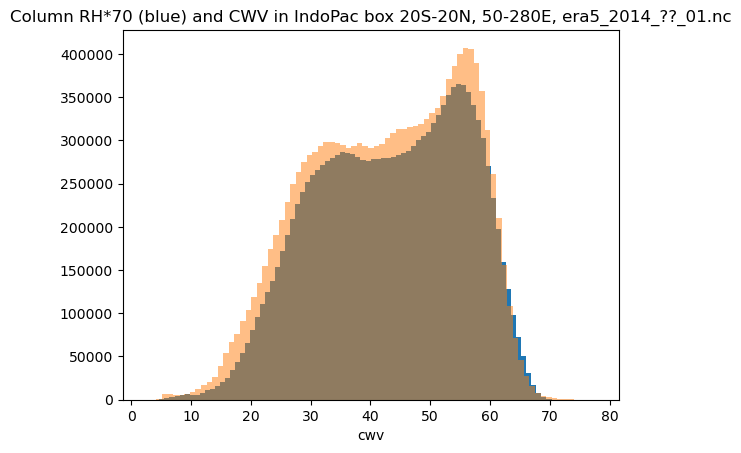

In [71]:
(tropics.cwv/tropics.cwv_sat *70).plot(bins=81); 
(tropics.cwv).plot(bins=81, alpha=0.5); plt.title('Column RH*70 (blue) and CWV in IndoPac box 20S-20N, 50-280E, era5_2014_??_01.nc')

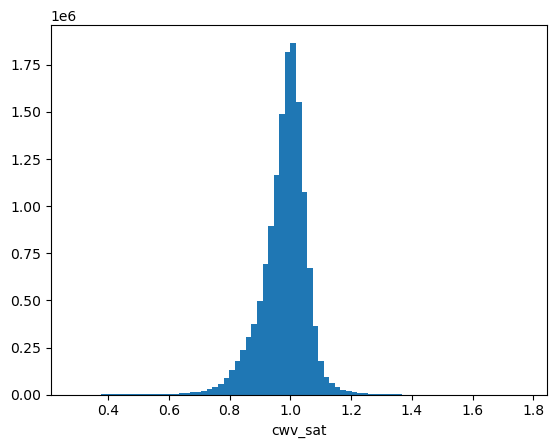

In [73]:
(tropics.cwv_sat/70).plot(bins=81);

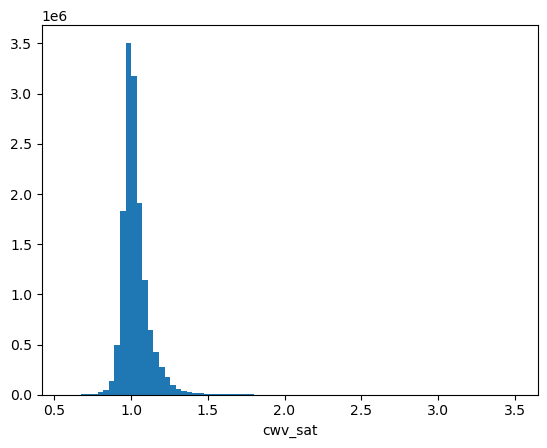

In [74]:
(70./tropics.cwv_sat).plot(bins=81);

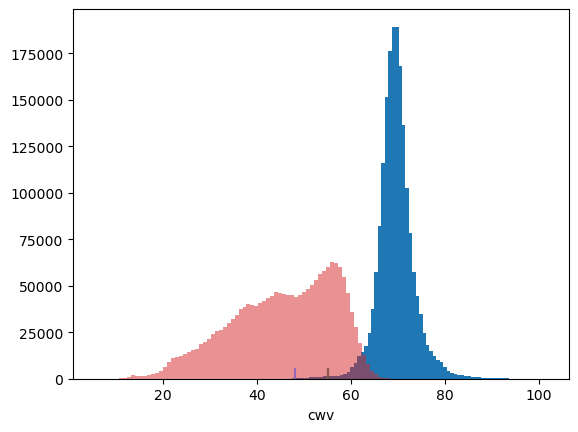

In [66]:
# WEIO box 40-75, -15 to 15 as used in MERRA2 histogram 
WEIO = ds.sel(lat=slice(-15,15),lon=slice(50,90))
WEIO.cwv_sat.plot(bins=81); plt.plot([48,48],[0,5000]); plt.plot([55,55],[0,5000])
WEIO.cwv.plot(bins=81, alpha=0.5); plt.plot([48,48],[0,5000]); plt.plot([55,55],[0,5000])

Text(0.5, 1.0, 'Column RH*70 (blue) and CWV in WEIO box -15-15N, 50-90E, era5_2014_??_01.nc')

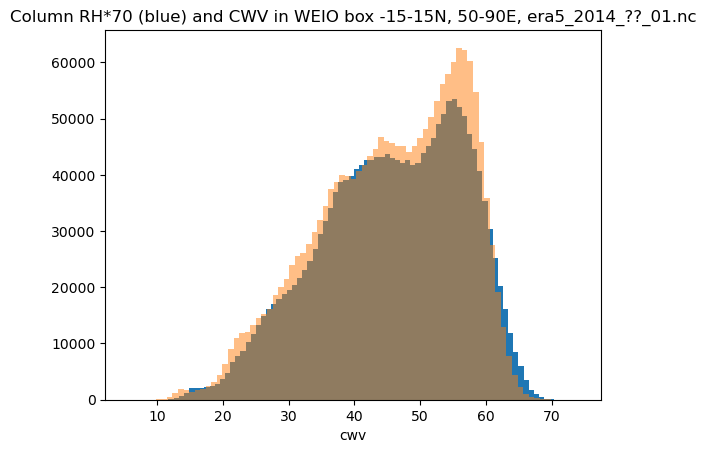

In [67]:
(WEIO.cwv/WEIO.cwv_sat *70).plot(bins=81); 
(WEIO.cwv).plot(bins=81, alpha=0.5); plt.title('Column RH*70 (blue) and CWV in WEIO box -15-15N, 50-90E, era5_2014_??_01.nc')


# AMSR2 

In [17]:
!ls ~/Box/VaporLakes/data/AMSR2/2014/*2014-01-0*.nc

/Users/bmapes/Box/VaporLakes/data/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-01-01_v08.2.nc
/Users/bmapes/Box/VaporLakes/data/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-01-02_v08.2.nc
/Users/bmapes/Box/VaporLakes/data/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-01-03_v08.2.nc
/Users/bmapes/Box/VaporLakes/data/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-01-04_v08.2.nc
/Users/bmapes/Box/VaporLakes/data/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-01-05_v08.2.nc
/Users/bmapes/Box/VaporLakes/data/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-01-06_v08.2.nc
/Users/bmapes/Box/VaporLakes/data/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-01-07_v08.2.nc
/Users/bmapes/Box/VaporLakes/data/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-01-08_v08.2.nc
/Users/bmapes/Box/VaporLakes/data/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-01-09_v08.2.nc


In [18]:
# https://stackoverflow.com/questions/65376109/use-xarray-open-mfdataset-on-files-with-no-time-dimension-included
from datetime import datetime
def add_time_dim(xda):
    xda = xda.expand_dims(times = [datetime.now()])
    return xda

In [22]:
amsr2 = xr.open_mfdataset('/Users/bmapes/Box/VaporLakes/data/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-01-01_v08.2.nc')
amsr2

/Users/bmapes/miniconda3/envs/VaporLakes/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


<xarray.Dataset>
Dimensions:             (lon: 1440, lat: 720, pass: 2)
Coordinates:
  * lon                 (lon) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * pass                (pass) int32 1 2
Data variables:
    time                (pass, lat, lon) datetime64[ns] dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    SST                 (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    wind_speed_LF       (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    wind_speed_MF       (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    wind_speed_AW       (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    water_vapor         (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    cloud_liquid_water  (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    rain_rate           (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    land_mask           (pass, lat, lon) int8 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    sea_ice_mask        (pass, lat, lon) int8 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    coast_mask          (pass, lat, lon) int8 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    noobs_mask          (pass, lat, lon) int8 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
Attributes: (12/51)
    Conventions:                            CF-1.6
    title:                                  RSS AMSR2 V8.2 Air-Sea Essential ...
    summary:                                RSS climate quality air-sea produ...
    version:                                8.2
    processing_level:                       Level 3: 0.25 deg daily maps
    history:                                created by RSS
    ...                                     ...
    geospatial_lon_units:                   degrees_east
    references:                             Source_of_AMSR2_radiometer_observ...
    averaging_procedure:                    each grid cell contains valid obs...
    approx_local_equatorial_crossing_time:  node_dimension 1 = 13:30h,  node_...
    pass:                                   node_dimension 1 = ascending,  no...
    acknowledgement:                        AMSR2 AS-ECVs are produced by Rem...

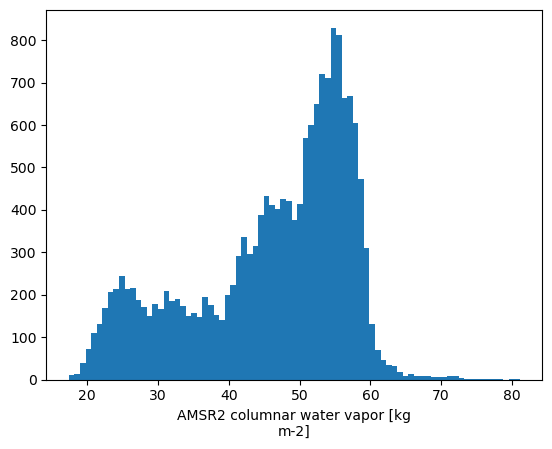

In [27]:
amsr2.water_vapor.sel(lat=slice(-15,15),lon=slice(40,75)).plot(bins=81);

### Get time of day field

/Users/bmapes/miniconda3/envs/VaporLakes/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/bmapes/miniconda3/envs/VaporLakes/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


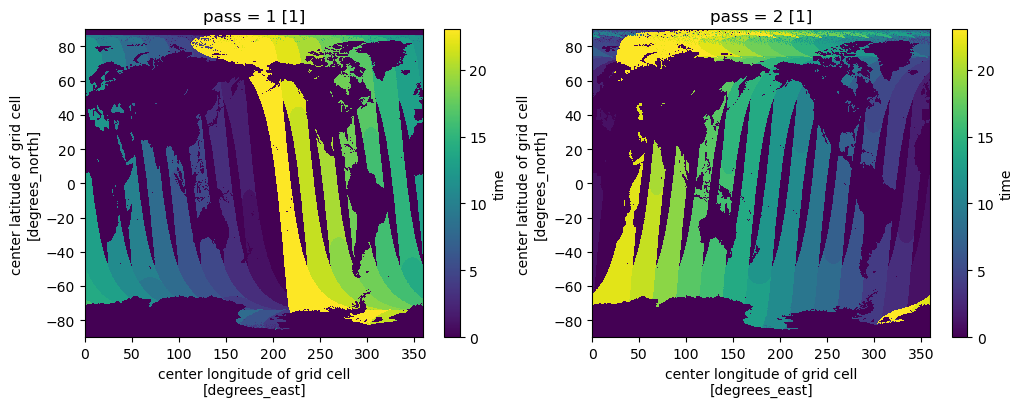

In [4]:
# https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64/70905349#70905349

Y, M, D, h, m, s = [amsr2.time.astype('datetime64[%s]' % kind) for kind in 'YMDhms']

years = Y.astype(int) + 1970
months = M.astype(int) % 12 + 1
days = (D - M).astype(int) + 1
hours = (h - D).astype(int)
minutes = (m - h).astype(int)
seconds = (s - m).astype(int)

# Make a plot 
plt.figure(figsize=[12,4])
plt.subplot(121)
hours[0].plot()
plt.subplot(122)
hours[1].plot()

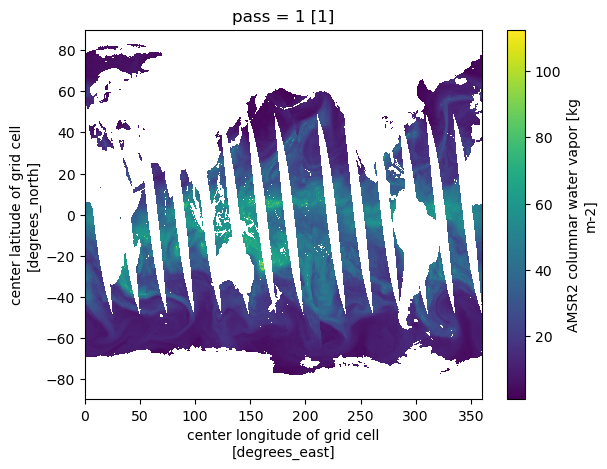

In [5]:
amsr2.water_vapor[0].plot()

# Multiple AMSR2 daily files: make a time series dataset 

In [88]:
!ls ~/Box/VaporLakes/data/AMSR2/

2012            2015            2018            2021            get_all_days.sh
2013            2016            2019            2022
2014            2017            2020            2023


In [25]:
# trick from https://stackoverflow.com/questions/65376109/
#                  use-xarray-open-mfdataset-on-files-with-no-time-dimension-included

from datetime import datetime 
def add_time_dim(xda):
    xda = xda.expand_dims(days = [datetime.now()])
    return xda

In [81]:
amsr2s14 = amsr2s # have this one 

In [91]:
# whole years, several of them  

amsr2s = xr.open_mfdataset('~/Box/VaporLakes/data/AMSR2/201[3,5,6,7,8,9]/RSS_AMSR2_ocean_L3_daily_*.nc',
                           preprocess = add_time_dim) # pool data, ignore time coordinate not being monotonic
amsr2s

/Users/bmapes/miniconda3/envs/VaporLakes/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/bmapes/miniconda3/envs/VaporLakes/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/bmapes/miniconda3/envs/VaporLakes/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/bmapes/miniconda3/envs/VaporLakes/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/bmapes/miniconda3/envs/VaporLakes/lib/python3.11/site-packages/xarray/coding/times.py

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [ ]:
x = amsr2s.SST.plot.hist(bins=100)

In [ ]:
import numpy as np 
centers = x[1][1:] + np.gradient(x[1]).mean()/2

In [ ]:
plt.plot(centers, x[0])

In [ ]:
for i in [25,26,27,28,29,30]:
    name='x'+str(i)
    do_me = name + '=amsr2s.where(amsr2s.SST >'+str(i)+').water_vapor.plot(bins=100)'
    print(do_me)
    exec(do_me)

In [ ]:
#Add a label= to each of your plot() calls, and then call legend(loc='upper left').

for i in [25,26,27,28,29,30]:
    name='x'+str(i)  
    do_me = 'plt.plot(' +name+ '[1][1:],' +name+ "[0],label='SST>" +str(i)+"')"
    print(do_me)
    exec(do_me)

plt.legend()
plt.title('AMSR2 2013-2019 CWV histograms by SST thresholds')

(array([5.9560000e+03, 3.1175900e+05, 2.0474790e+06, 5.2483590e+06,
        9.0475540e+06, 1.2242214e+07, 1.3285158e+07, 1.3288272e+07,
        1.2781971e+07, 1.2220118e+07, 1.1640145e+07, 1.1117222e+07,
        1.0636770e+07, 1.0098955e+07, 9.5723080e+06, 9.0342390e+06,
        8.5316710e+06, 8.0626950e+06, 7.5280930e+06, 7.0372880e+06,
        6.6568430e+06, 6.2718650e+06, 5.9460650e+06, 5.6711000e+06,
        5.4416560e+06, 5.2658020e+06, 5.0891110e+06, 4.8915500e+06,
        4.6953970e+06, 4.4912090e+06, 4.2954150e+06, 4.1264000e+06,
        3.9574540e+06, 3.7896000e+06, 3.5991350e+06, 3.4739240e+06,
        3.3722470e+06, 3.2566390e+06, 3.1390590e+06, 3.0262670e+06,
        2.9185510e+06, 2.8241660e+06, 2.7637860e+06, 2.7274920e+06,
        2.6808240e+06, 2.6793940e+06, 2.7567570e+06, 2.8452630e+06,
        2.9061630e+06, 2.9316840e+06, 2.8518080e+06, 2.6553660e+06,
        2.2981890e+06, 1.8163800e+06, 1.3111560e+06, 8.7384000e+05,
        5.5756800e+05, 3.6000700e+05, 2.4540600e

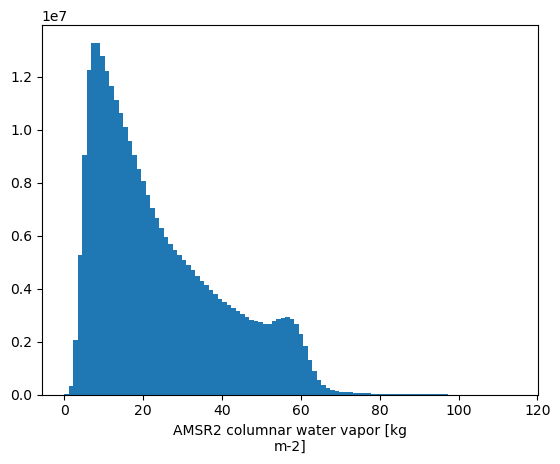

In [92]:
amsr2s14.water_vapor.plot(bins=100)

In [164]:
# WEIO box 40-75, -15 to 15 as used in MERRA2 histogram 
mybox = amsr2s.sel(lat=slice(-15,15),lon=slice(40,75))
mybox

,Array,Chunk
Bytes,93.57 MiB,262.50 kiB
Shape,"(365, 2, 120, 140)","(1, 2, 120, 140)"
Count,1825 Tasks,365 Chunks
Type,datetime64[ns],numpy.ndarray
,Array,Chunk
Bytes,46.78 MiB,131.25 kiB
Shape,"(365, 2, 120, 140)","(1, 2, 120, 140)"
Count,1825 Tasks,365 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


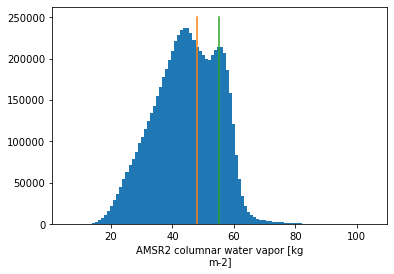

In [171]:
mybox.water_vapor.plot(bins=100); plt.plot([48,48],[0,250000]); plt.plot([55,55],[0,250000])

In [170]:
# Speeds up replotting

histo = mybox.groupby_bins('water_vapor',100).mean()
histo.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [172]:
histo

<xarray.Dataset>
Dimensions:             (water_vapor_bins: 100)
Coordinates:
  * water_vapor_bins    (water_vapor_bins) object (5.77, 6.86] ... (103.999, ...
Data variables:
    SST                 (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wind_speed_LF       (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wind_speed_MF       (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wind_speed_AW       (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    water_vapor         (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    cloud_liquid_water  (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    rain_rate           (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    land_mask           (water_vapor_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    sea_ice_mask        (water_vapor_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    coast_mask          (water_vapor_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    noobs_mask          (water_vapor_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>

In [ ]:
Y, M, D, h, m, s = [amsr2s.time.astype('datetime64[%s]' % kind) for kind in 'YMDhms']

years = Y.astype(int) + 1970
months = M.astype(int) % 12 + 1
days = (D - M).astype(int) + 1
hours = (h - D).astype(int)
minutes = (m - h).astype(int)
seconds = (s - m).astype(int)



In [ ]:
# Assign proper times 

# amsr2s['times'] = 
